In [1]:
import nltk

In [2]:
import pandas as pd
reviews = pd.read_csv('K8 Reviews v0.2.csv')

In [3]:
reviews.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [4]:
from wordcloud import WordCloud
from nltk.stem import PorterStemmer, SnowballStemmer
import numpy as np
import pandas as pd
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [5]:
reviews_combined =" ".join(reviews.review.values)

In [6]:
def clean_txt(sent):
    tokens = word_tokenize(sent.lower())
    stemmer_s = SnowballStemmer("english")
    stop_updated = stopwords.words("english") + list(punctuation) 
    final_word = [term for term in tokens if term not in stop_updated 
               and len(term) > 2] 
    res = " ".join(final_word)
    return res

In [7]:
doc1_clean = clean_txt(reviews_combined)
doc1_clean[:100]

'good need updates improvements worst mobile bought ever battery draining like hell backup hours inte'

In [8]:
doc = pd.DataFrame([doc1_clean], columns=["text"])
doc.head()

,text
0,good need updates improvements worst mobile bo...


In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
# bigram
count_vectorizer_bg = CountVectorizer(ngram_range=(2,2))
x_bg = count_vectorizer_bg.fit_transform(doc['text'])

In [11]:
DTM_bg = pd.DataFrame(x_bg.toarray(), columns = count_vectorizer_bg.get_feature_names())
DTM_bg =DTM_bg.T.reset_index()

In [12]:
DTM_bg=DTM_bg.sort_values(by=0, ascending=False)

In [14]:
DTM_bg=DTM_bg.rename(columns={'index':'words',0: "freq"}).reset_index()

In [15]:
DTM_bg=DTM_bg.drop(['index'], axis=1)

In [19]:
DTM_bg=DTM_bg.head(20)

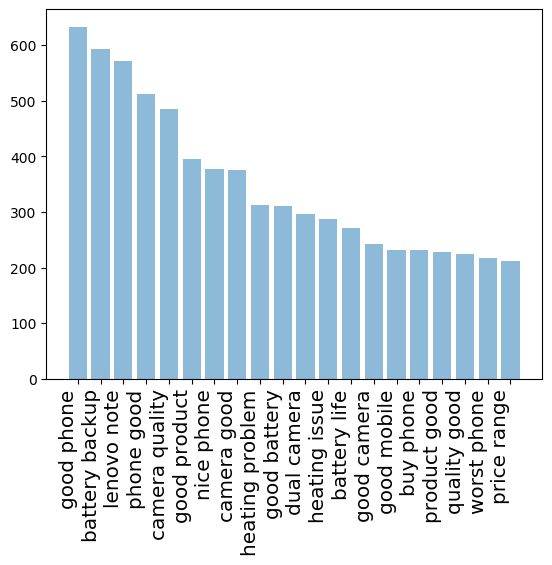

In [34]:
import matplotlib.pyplot as plt
X= DTM_bg['words']
Y=DTM_bg['freq']

plt.bar(X, Y, align='center', alpha=0.5)
plt.xticks(rotation=90,horizontalalignment='right',fontweight='light',fontsize='x-large')

plt.show()